In [1]:
import pandas as pd
import numpy as np
import mysql.connector


In [2]:
from sys import path
path.append('/Users/ridleyleisy/dev/nfl/database/data/')
from db_getter import dbGetter

In [12]:
db = dbGetter()
%load_ext dotenv
%dotenv /Users/ridleyleisy/dev/nfl/database/.env

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [13]:
results = db.query('''SELECT * 
FROM `passing` as p
JOIN plays_flat as pf
ON p.pid = pf.pid

LEFT JOIN games as g 
ON pf.gid = g.gid''')

In [14]:

results

[(3,
  'JG-0600',
  'JR-2000',
  'NL',
  10,
  1,
  1,
  0,
  '',
  1,
  3,
  '(15:00) J.Garcia pass to J.Rice to SF 37 for 10 yards (R.Buchanan).',
  'SF',
  'ATL',
  'PASS',
  2,
  30,
  1,
  15,
  0,
  0,
  0,
  3,
  3,
  '2',
  '9',
  '27',
  '2',
  '10',
  'Y',
  'Y',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'JG-0600',
  'Y',
  '',
  '',
  'JR-2000',
  '',
  'RB-4600',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  1,
  2000,
  1,
  'SUN',
  'SF',
  'ATL',
  'Georgia Dome',
  '79',
  '',
  '',
  '',
  'Dome',
  'AstroTurf',
  Decimal('42.5'),
  Decimal('7.0'),
  28,
  36),
 (5,
  'JG-0600',
  'TO-0200',
  'NL',
  19,
  1,
  1,
  0,
  '',
  1,
  5,
  '(15:00) J.Garcia pass to T.Owens to ATL 40 for 19 yards (K.Brooking).',
  'SF',
  'ATL',
 

In [ ]:
pass_cols = [val[0] for val in db.query('DESCRIBE passing')]
plays_cols = [val[0] for val in db.query('DESCRIBE plays_flat')]
game_cols = [val[0] for val in db.query('DESCRIBE games')]

In [5]:
cols = []
cols.extend(pass_cols)
cols.extend(plays_cols)
cols.extend(game_cols)

NameError: name 'pass_cols' is not defined

In [6]:
len(cols)

0

In [7]:
df = pd.DataFrame(results, columns=cols)

NameError: name 'results' is not defined

In [8]:
df = df.loc[:,~df.columns.duplicated()]

NameError: name 'df' is not defined

In [9]:
df.columns

NameError: name 'df' is not defined

In [ ]:
season_total = df.groupby(['trg','seas'])['yds'].sum()

In [10]:
passing_incr = ((season_total.shift(1) - season_total) / season_total).replace([np.inf, -np.inf], np.nan)

NameError: name 'season_total' is not defined

In [11]:
passing_incr.head()

NameError: name 'passing_incr' is not defined

In [12]:
passing_incr = pd.DataFrame(passing_incr).reset_index()

NameError: name 'passing_incr' is not defined

In [16]:
passing_incr.head()

,trg,seas,yds
0,,2000.0,NaN
1,,2001.0,0.714286
2,,2002.0,-0.641026
3,,2003.0,-0.064000
4,,2004.0,0.893939


In [17]:
# setting the first year of the wr percent increase to 0
first_season = passing_incr['trg'].searchsorted(passing_incr['trg'].unique())
passing_incr.loc[first_season,'yds'] = 0

In [18]:
passing_incr = passing_incr.loc[passing_incr['trg'] != '']

In [19]:
season_total['AB-0400']

seas
2001.0    50
2002.0     0
2003.0    69
2004.0    10
2005.0     0
Name: yds, dtype: int64

In [20]:
passing_incr.fillna(0,inplace=True)

In [21]:
import seaborn as sns

In [22]:
passing_incr.head()

,trg,seas,yds
19,AA-0025,2015.0,0.000000
20,AA-0025,2016.0,2.210526
21,AA-0025,2017.0,-0.648148
22,AA-0025,2018.0,4.785714
23,AA-0557,2018.0,0.000000


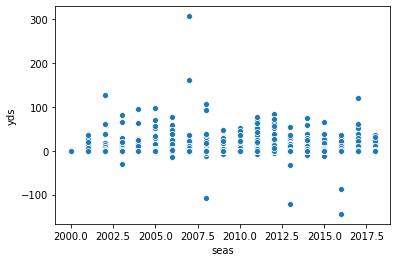

In [23]:
sns.scatterplot(passing_incr['seas'],passing_incr['yds'])

In [24]:
passing_incr.head()

,trg,seas,yds
19,AA-0025,2015.0,0.000000
20,AA-0025,2016.0,2.210526
21,AA-0025,2017.0,-0.648148
22,AA-0025,2018.0,4.785714
23,AA-0557,2018.0,0.000000


In [25]:
import altair as alt

In [26]:
sub = passing_incr.loc[passing_incr['trg']=='JJ-4700']

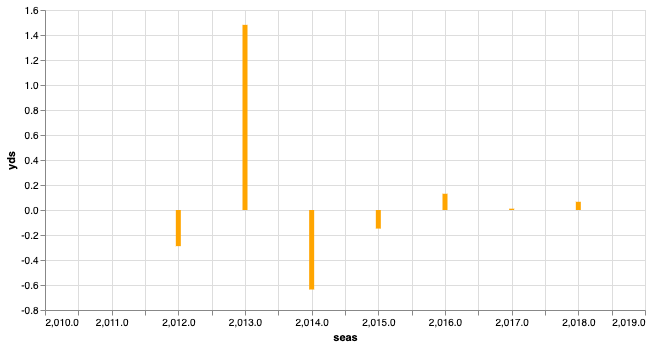

In [27]:
alt.Chart(sub).mark_bar().encode(
    x="seas:Q",
    y="yds:Q",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("steelblue"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=600)

In [32]:
df.columns

Index(['pid', 'psr', 'trg', 'loc', 'yds', 'comp', 'succ', 'spk', 'dfb', 'gid',
       'detail', 'off', 'def', 'type', 'dseq', 'len', 'qtr', 'min', 'sec',
       'ptso', 'ptsd', 'timo', 'timd', 'dwn', 'ytg', 'yfog', 'zone', 'fd',
       'sg', 'nh', 'pts', 'bc', 'kne', 'dir', 'rtck1', 'rtck2', 'ptck1',
       'ptck2', 'sk1', 'sk2', 'ptm1', 'pen1', 'desc1', 'cat1', 'pey1', 'act1',
       'ptm2', 'pen2', 'desc2', 'cat2', 'pey2', 'act2', 'ptm3', 'pen3',
       'desc3', 'cat3', 'pey3', 'act3', 'ints', 'iry', 'fum', 'frcv', 'fry',
       'forc', 'saf', 'blk', 'brcv', 'fgxp', 'fkicker', 'dist', 'good',
       'punter', 'pgro', 'pnet', 'ptb', 'pr', 'pry', 'pfc', 'kicker', 'kgro',
       'knet', 'ktb', 'kr', 'kry', 'seas', 'wk', 'day', 'v', 'h', 'stad',
       'temp', 'humd', 'wspd', 'wdir', 'cond', 'surf', 'ou', 'sprv', 'ptsv',
       'ptsh'],
      dtype='object')

In [33]:
df.head()

,pid,psr,trg,loc,yds,comp,succ,spk,dfb,gid,...,temp,humd,wspd,wdir,cond,surf,ou,sprv,ptsv,ptsh
0,3,JG-0600,JR-2000,NL,10,1,1,0,,1,...,79,,,,Dome,AstroTurf,42.5,7.0,28.0,36.0
1,5,JG-0600,TO-0200,NL,19,1,1,0,,1,...,79,,,,Dome,AstroTurf,42.5,7.0,28.0,36.0
2,7,JG-0600,CG-0400,NL,24,1,1,0,,1,...,79,,,,Dome,AstroTurf,42.5,7.0,28.0,36.0
3,9,JG-0600,FB-0200,NL,4,1,1,0,,1,...,79,,,,Dome,AstroTurf,42.5,7.0,28.0,36.0
4,15,CC-1400,BC-1100,NL,0,0,0,0,,1,...,79,,,,Dome,AstroTurf,42.5,7.0,28.0,36.0


In [36]:
atl_df = df.loc[(df['off'] == 'ATL') | (df['def'] == 'ATL')]

In [38]:
atl_df.columns

Index(['pid', 'psr', 'trg', 'loc', 'yds', 'comp', 'succ', 'spk', 'dfb', 'gid',
       'detail', 'off', 'def', 'type', 'dseq', 'len', 'qtr', 'min', 'sec',
       'ptso', 'ptsd', 'timo', 'timd', 'dwn', 'ytg', 'yfog', 'zone', 'fd',
       'sg', 'nh', 'pts', 'bc', 'kne', 'dir', 'rtck1', 'rtck2', 'ptck1',
       'ptck2', 'sk1', 'sk2', 'ptm1', 'pen1', 'desc1', 'cat1', 'pey1', 'act1',
       'ptm2', 'pen2', 'desc2', 'cat2', 'pey2', 'act2', 'ptm3', 'pen3',
       'desc3', 'cat3', 'pey3', 'act3', 'ints', 'iry', 'fum', 'frcv', 'fry',
       'forc', 'saf', 'blk', 'brcv', 'fgxp', 'fkicker', 'dist', 'good',
       'punter', 'pgro', 'pnet', 'ptb', 'pr', 'pry', 'pfc', 'kicker', 'kgro',
       'knet', 'ktb', 'kr', 'kry', 'seas', 'wk', 'day', 'v', 'h', 'stad',
       'temp', 'humd', 'wspd', 'wdir', 'cond', 'surf', 'ou', 'sprv', 'ptsv',
       'ptsh'],
      dtype='object')

In [40]:
atl_df.groupby(['seas'])['sg'].count()

seas
2000.0    1032
2001.0    1000
2002.0    1130
2003.0     968
2004.0    1015
2005.0     977
2006.0     932
2007.0    1091
2008.0    1056
2009.0    1106
2010.0    1202
2011.0    1229
2012.0    1300
2013.0    1175
2014.0    1198
2015.0    1182
2016.0    1343
2017.0    1223
2018.0    1122
Name: sg, dtype: int64